# Hausdorff Distance Implementation

In [56]:
!pip install hausdorff -q
from hausdorff import hausdorff_distance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(0)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Using py-hausdorff library

In [57]:
X = np.random.random((1000,100))
Y = np.random.random((5000,100))

# Test computation of Hausdorff distance with different base distances
print(f"Hausdorff distance test: {hausdorff_distance(X, Y, distance='manhattan')}")
print(f"Hausdorff distance test: {hausdorff_distance(X, Y, distance='euclidean')}")
print(f"Hausdorff distance test: {hausdorff_distance(X, Y, distance='chebyshev')}")
print(f"Hausdorff distance test: {hausdorff_distance(X, Y, distance='cosine')}")

Hausdorff distance test: 29.195107161831146
Hausdorff distance test: 3.668161325513714
Hausdorff distance test: 0.8289005532480906
Hausdorff distance test: 0.21390438319461313


### Testing with an example

In [59]:
X_2d = np.random.random((10, 2))
Y_2d = np.random.random((20, 2))
print(f"Hausdorff distance test using library: {hausdorff_distance(X_2d, Y_2d, distance='euclidean')}")

Hausdorff distance test using library: 0.36263262054346523


In [60]:
# Hausdorff distance = max(min(dist(X, Y)), min(dist(Y, X)))
dist_matrix = cdist(X_2d, Y_2d, metric='euclidean')
X_to_Y_distances = dist_matrix.min(axis=1)
Y_to_X_distances = dist_matrix.min(axis=0)
hausdorff_distance_calc = max(X_to_Y_distances.max(), Y_to_X_distances.max())
print(f"Hausdorff distance test using calculation: {hausdorff_distance_calc}")


Hausdorff distance test using calculation: 0.36263262054346523


In [61]:
dist_df = pd.DataFrame(np.round(dist_matrix, 2))
display(dist_df)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.36,0.33,0.32,0.49,0.25,0.50,0.20,0.51,0.28,0.51,0.35,0.29,0.34,0.11,0.20,0.64,0.69,0.41,0.32,0.64
1,0.56,0.94,0.72,1.02,0.80,1.02,0.49,1.01,0.73,0.13,0.27,0.72,0.27,0.72,0.68,0.55,0.33,0.77,0.72,0.39
2,0.59,0.20,0.21,0.25,0.36,0.26,0.31,0.28,0.45,0.70,0.55,0.18,0.53,0.15,0.38,0.65,0.79,0.28,0.21,0.71
3,0.44,0.65,0.43,0.73,0.56,0.73,0.20,0.72,0.53,0.22,0.11,0.43,0.08,0.44,0.46,0.43,0.37,0.49,0.44,0.35
4,1.07,1.03,0.63,0.90,1.10,0.88,0.65,0.84,1.11,0.77,0.75,0.66,0.71,0.90,1.04,0.22,0.39,0.58,0.63,0.33
5,1.17,1.06,0.66,0.90,1.16,0.87,0.73,0.83,1.19,0.89,0.85,0.69,0.82,0.95,1.11,0.32,0.53,0.59,0.66,0.46
6,1.01,0.73,0.37,0.52,0.90,0.49,0.55,0.45,0.96,0.88,0.78,0.39,0.74,0.67,0.88,0.40,0.67,0.28,0.36,0.56
7,0.98,0.44,0.39,0.15,0.72,0.13,0.63,0.11,0.82,1.04,0.90,0.40,0.87,0.54,0.76,0.78,1.01,0.36,0.39,0.91
8,1.04,0.96,0.56,0.83,1.04,0.80,0.60,0.77,1.06,0.75,0.72,0.59,0.68,0.83,0.98,0.18,0.41,0.51,0.57,0.32
9,0.72,0.59,0.19,0.51,0.66,0.49,0.25,0.47,0.70,0.58,0.47,0.22,0.43,0.45,0.62,0.27,0.46,0.18,0.20,0.36


In [62]:
# Identify critical points contributing to Hausdorff distance
# Farthest point in X with respect to Y
farthest_point_X_idx = np.argmax(X_to_Y_distances)
farthest_point_X = X_2d[farthest_point_X_idx]
# Farthest point in Y with respect to X
farthest_point_Y_idx = np.argmax(Y_to_X_distances)
farthest_point_Y = Y_2d[farthest_point_Y_idx]
# Verify the distances to ensure correctness
farthest_point_X_distance = X_to_Y_distances[farthest_point_X_idx]
farthest_point_Y_distance = Y_to_X_distances[farthest_point_Y_idx]

hausdorff_points = []

# Determine the maximum Hausdorff distance and the respective other point
if farthest_point_X_distance >= farthest_point_Y_distance:
	max_distance = farthest_point_X_distance
	closest_point_to_farthest_X_idx = np.argmin(dist_matrix[farthest_point_X_idx])
	closest_point_to_farthest_X = Y_2d[closest_point_to_farthest_X_idx]
	print(f"Farthest point in X with respect to Y: {farthest_point_X}, Distance: {farthest_point_X_distance}")
	print(f"Closest point in Y to the farthest point in X: {closest_point_to_farthest_X}")
	hausdorff_points.append(farthest_point_X)
	hausdorff_points.append(closest_point_to_farthest_X)
else:
	max_distance = farthest_point_Y_distance
	closest_point_to_farthest_Y_idx = np.argmin(dist_matrix[:, farthest_point_Y_idx])
	closest_point_to_farthest_Y = X_2d[closest_point_to_farthest_Y_idx]
	print(f"Farthest point in Y with respect to X: {farthest_point_Y}, Distance: {farthest_point_Y_distance}")
	print(f"Closest point in X to the farthest point in Y: {closest_point_to_farthest_Y}")
	hausdorff_points.append(farthest_point_Y)
	hausdorff_points.append(closest_point_to_farthest_Y)

print(f"Maximum Hausdorff distance: {max_distance}")

Farthest point in Y with respect to X: [0.32345306 0.99398957], Distance: 0.36263262054346523
Closest point in X to the farthest point in Y: [0.29781933 0.63226408]
Maximum Hausdorff distance: 0.36263262054346523


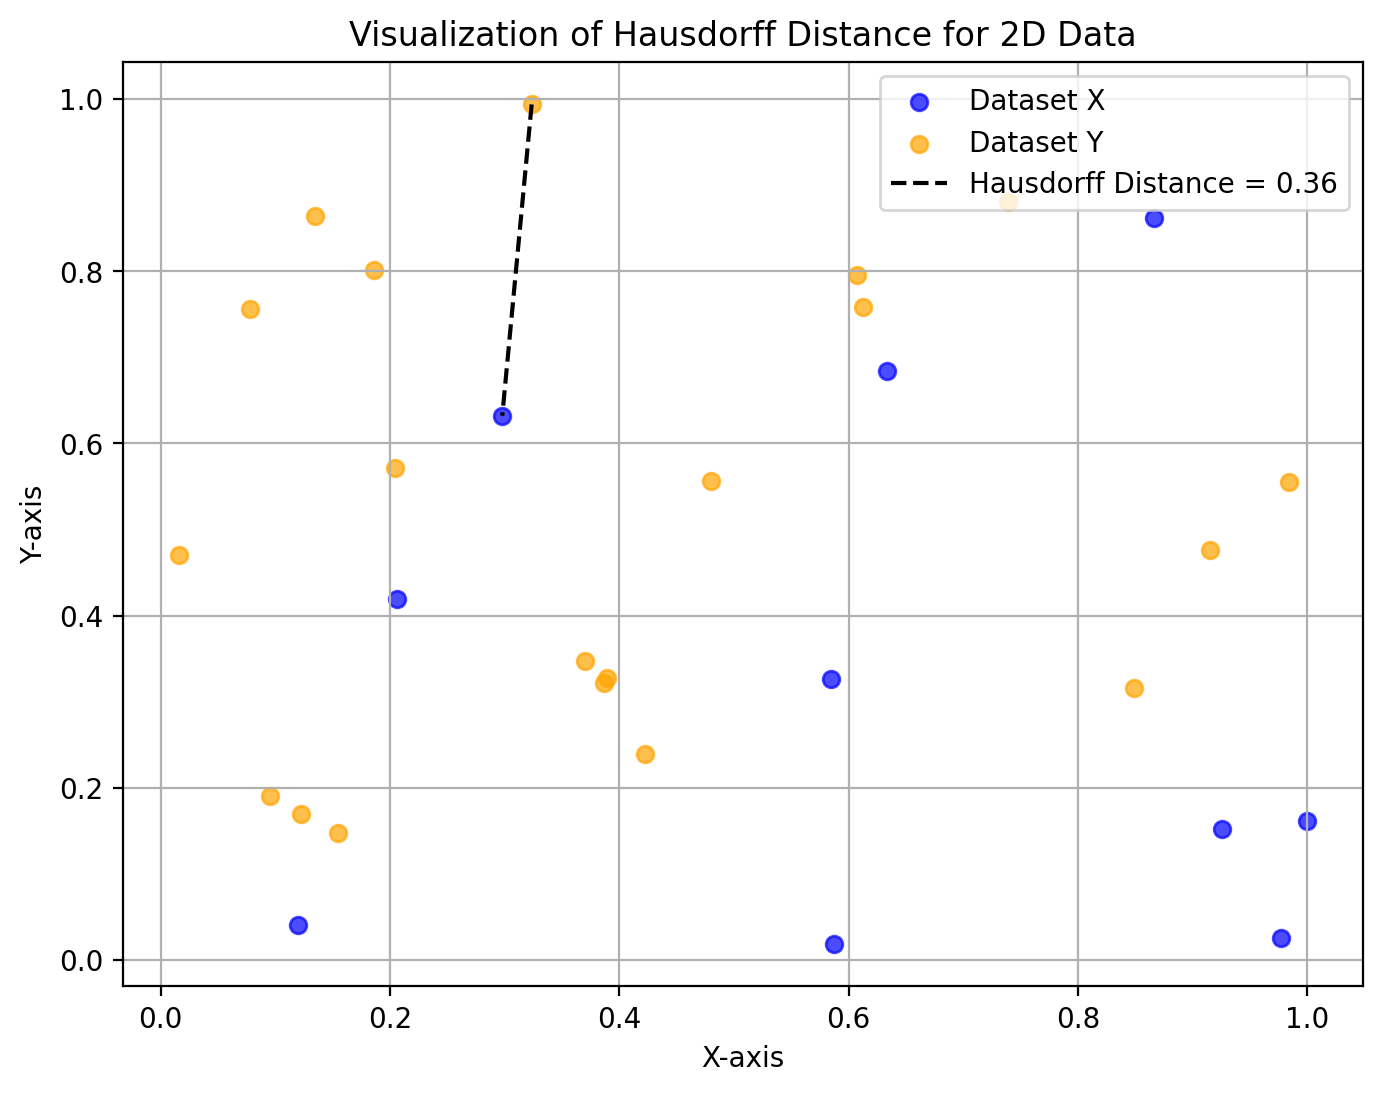

In [64]:
plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], alpha=0.7, label="Dataset X", color="blue")
plt.scatter(Y_2d[:, 0], Y_2d[:, 1], alpha=0.7, label="Dataset Y", color="orange")
plt.plot(
	[hausdorff_points[0][0], hausdorff_points[1][0]],
	[hausdorff_points[0][1], hausdorff_points[1][1]],
    'k--',
    label=f"Hausdorff Distance = {hausdorff_distance_calc:.2f}",
)
plt.title("Visualization of Hausdorff Distance for 2D Data")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.grid()
plt.show()
